# *Shannon entropy* vs *Spatial entropy*

Currently, there are two spatial entropy have been implemented:
 
- Leibovici's entropy
- Altieri's entropy

Here we are going to compare the difference between Shannon's entropy and the spatial entropy

## Shannon entropy

Given a random variable $X$, with possible outcomes $x_{i}$, each with probability $P(x_{i})$, the entropy $H(X)$ of $X$ is as follows:

$$H(X) = - \sum_{i=1}^n P(x_i)log(P(x_i))$$

Let's generate some synthetic data

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spatialentropy import leibovici_entropy, altieri_entropy

In [3]:
from utils import plot_points, random_data, cluster_data

Define a window where we want to put our points, it's a 100\*100 square

In [4]:
window = [(0,0),(100,0),(100,100),(0,100)]

Random generate some types

In [5]:
types = np.random.choice(["lion", "tiger", "rabbit"], 200)

Generate synthetic data

In [6]:
# complete random data
pp = random_data(window, 200)

# cluster data
cpp1, cpp1_types = cluster_data(window, 200, 10, 10, types)

# more cluster data
cpp2, cpp2_types = cluster_data(window, 200, 3, 5, types)

Let's see what our data looks like

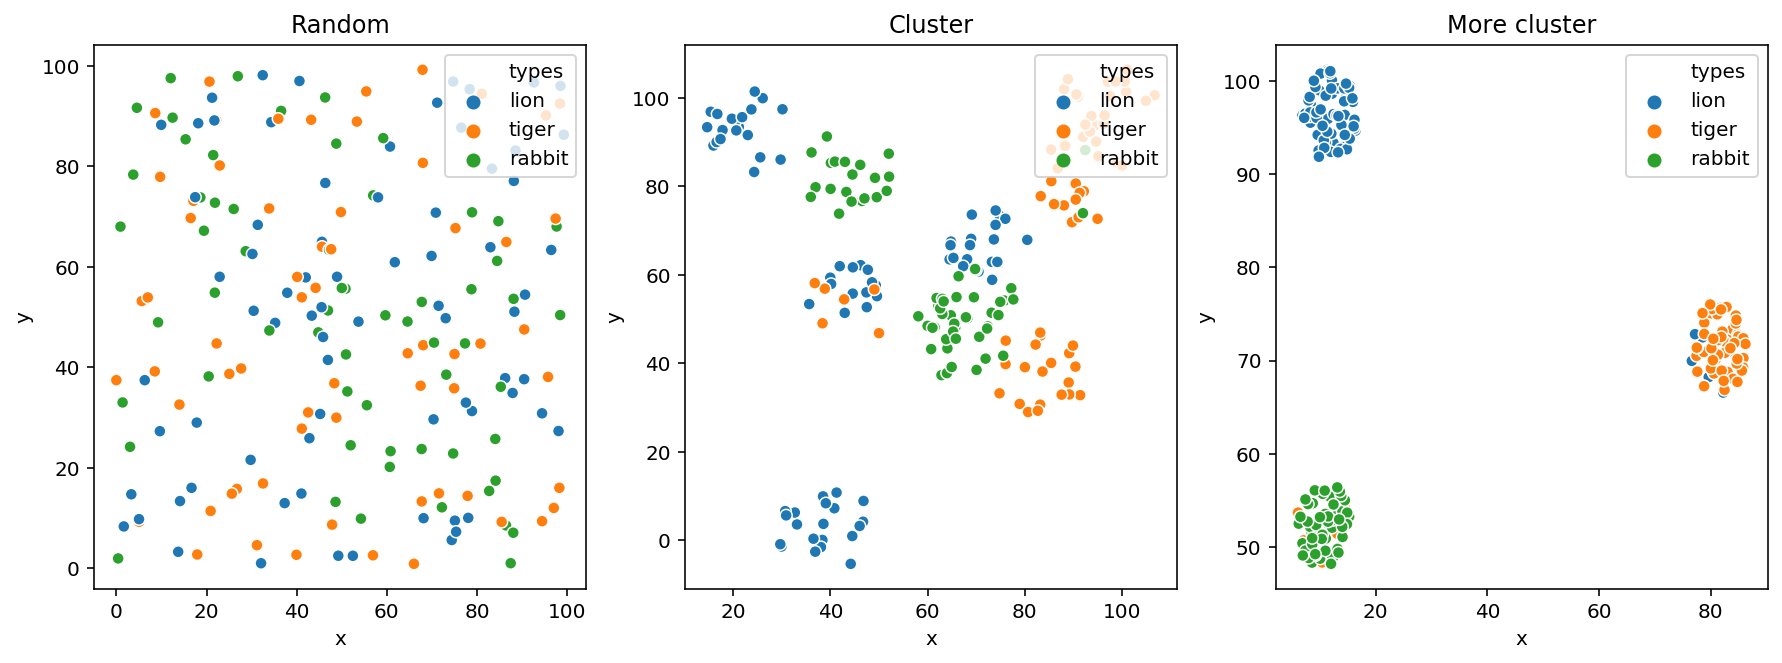

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
plot_points(pp, types, ax=ax1, title="Random")
plot_points(cpp1, cpp1_types, ax=ax2, title="Cluster")
plot_points(cpp2, cpp2_types, ax=ax3, title="More cluster")

Calculate shannon's entropy

In [8]:
from scipy.stats import entropy
from collections import Counter
c = np.asarray(list(Counter(types).values()))
c = c / c.sum()
shan_ent = entropy(c)

Calculate leibovici's entropy

In [9]:
lb_ent1 = leibovici_entropy(pp, types, d=10)
lb_ent2 = leibovici_entropy(cpp1, cpp1_types, d=10)
lb_ent3 = leibovici_entropy(cpp2, cpp2_types, d=10)
print("Entropy:", lb_ent1.entropy, lb_ent2.entropy, lb_ent3.entropy)

Entropy: 1.7767668644374703 1.4681168019374684 1.4196408288471043


Calculate altieri's entropy

In [10]:
ae1 = altieri_entropy(pp, types, cut=10)
ae2 = altieri_entropy(cpp1, cpp1_types, cut=10)
ae3 = altieri_entropy(cpp2, cpp2_types, cut=10)
print("Entropy:", ae1.entropy, ae2.entropy, ae3.entropy)
print("Mutual_info:", ae1.mutual_info, ae2.mutual_info, ae3.mutual_info)
print("Residue:", ae1.residue, ae2.residue, ae3.residue)

Entropy: 1.730102911859603 1.6718243660388914 1.2124483581208023
Mutual_info: 0.02739574646768011 0.4934388943001413 0.5434262636271646
Residue: 1.7027071653919228 1.17838547173875 0.6690220944936377


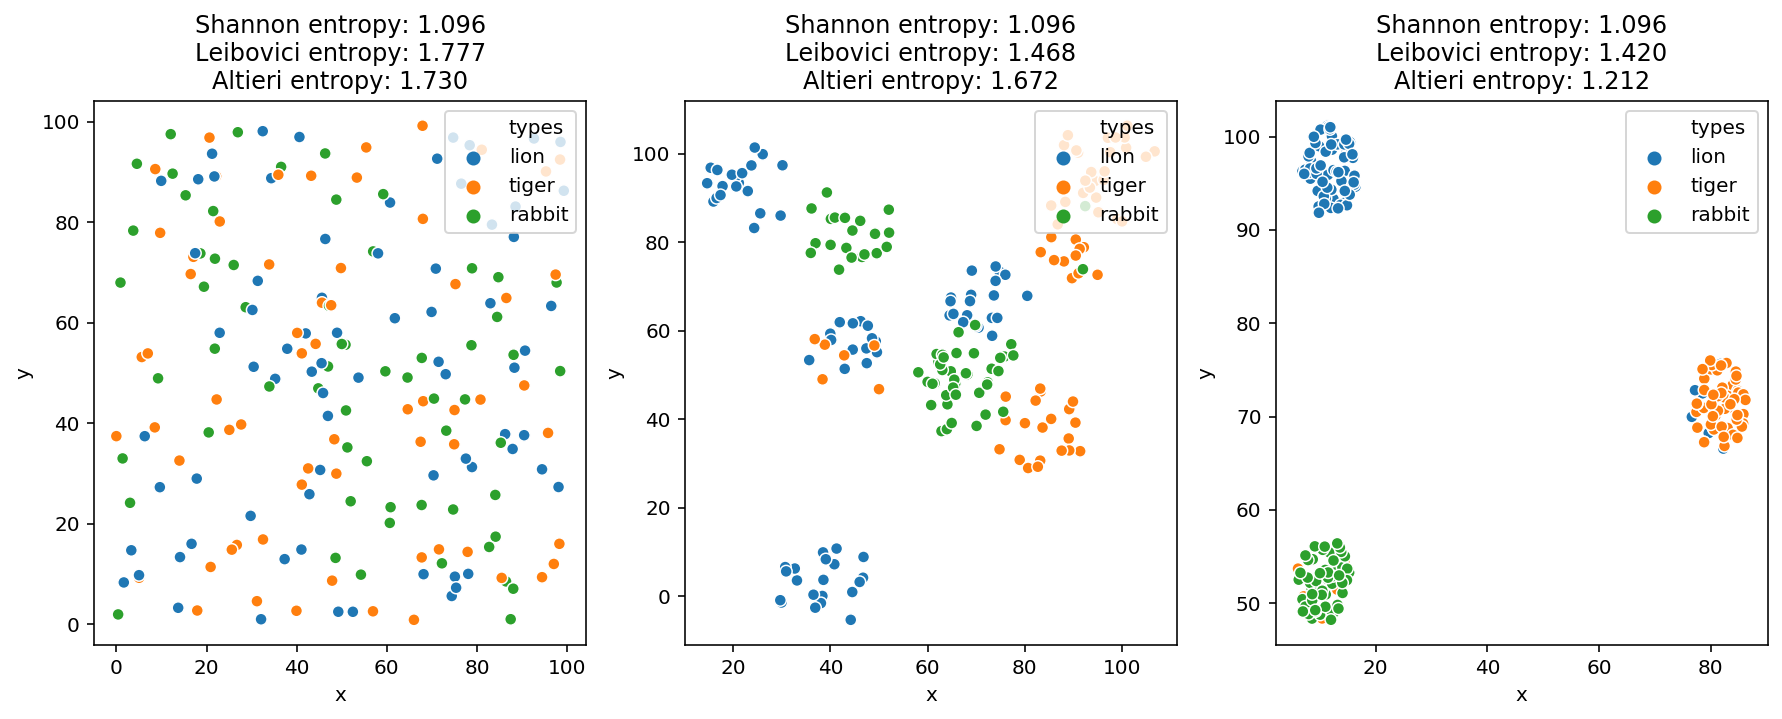

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
plot_points(pp, types, ax=ax1, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent1.entropy:.3f}\nAltieri entropy: {ae1.entropy:.3f}")
plot_points(cpp1, cpp1_types, ax=ax2, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent2.entropy:.3f}\nAltieri entropy: {ae2.entropy:.3f}")
plot_points(cpp2, cpp2_types, ax=ax3, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent3.entropy:.3f}\nAltieri entropy: {ae3.entropy:.3f}")

If you are interested in the details, feel free to read what's below.

I try to explain it easier than what's in the paper, but you should refer to the paper for more details

# Leibovici’s entropy

A new variable $Z$ is introduced. $Z$ is defined as co-occurrences across the space.

For example, we have $I$ types of cells. The combination of any two type of cells is $(x_i, x_{i'})$, the number of all combinations is denoted as $R$.

If order is preserved, $R = P_I^2 = I^2$; If the combinations are unordered, $R = C_I^2= (I^2+I)/2$

To a more general situation, consider the combination of $m$ types of cell, $R = P_I^m = I^m$ or $R=C_I^m$

At a user defined distance $d$, only co-occurrences with the distance $d$ will take into consideration.

$$H(Z|d) = \sum_{r=1}^{I^m}{p(z_r|d)}log(\frac{1}{p(z_r|d)})$$

Reference:

Leibovici, D. G., Claramunt, C., Le Guyader, D., & Brosset, D. (2014). Local and global spatio-temporal entropy indices based on distance-ratios and co-occurrences distributions. International Journal of Geographical Information Science, 28(5), 1061-1084. [link](https://www.tandfonline.com/doi/full/10.1080/13658816.2013.871284)

# Altieri's entropy

This introduce another new vairable $W$. $w_k$ represents a series of sample window, i.e. $[0,2][2,4][4,10],[10,...]$
while $k=1,...,K$

The purpose of this entropy is to decompose it into **Spatial mutual information** $MI(Z,W)$ and **Spatial residual entropy** $H(Z)_W$. 

$$H(Z)=\sum_{r=1}^Rp(z_r)log(\frac{1}{p(z_r)})=MI(Z,W)+H(Z)_W$$

$$H(Z)_W = \sum_{k=1}^Kp(w_k)H(Z|w_k)$$
$$H(Z|w_k) = \sum_{r=1}^Rp(z_r|w_k)log(\frac{1}{p(z_r|w_k)})$$

$$MI(Z,W)=\sum_{k=1}^Kp(w_k)PI(Z|w_k)$$
$$PI(Z|w_k)=\sum_{r=1}^Rp(z_r|w_k)log(\frac{p(z_r|w_k)}{p(z_r)})$$


Reference:

Altieri, L., Cocchi, D., & Roli, G. (2018). A new approach to spatial entropy measures. Environmental and ecological statistics, 25(1), 95-110. [link](https://link.springer.com/article/10.1007/s10651-017-0383-1)


